## Penjelasan Dataset yang digunakan

In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
## Penjelasan Dataset yang digunakan
## Dataset yang digunakan adalah kumpulan ulasan produk dari Tokopedia tahun 2019.  
## Analisis ini bertujuan untuk mengetahui sentimen pelanggan (positif, netral, negatif) berdasarkan teks ulasan.

## Kolom utama yang digunakan:
## 1. text → berisi teks ulasan pengguna.
## 2. rating → nilai bintang dari 1–5.
## 3. Kolom lain (product_name, category, sold, dll) bersifat tambahan.

In [1]:
# Import library dasar
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Library NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Library ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Download resource NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\Thinkpad
[nltk_data]     X390\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Thinkpad
[nltk_data]     X390\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Thinkpad
[nltk_data]     X390\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# 4. Load data
# Membaca file CSV dari folder dataset
data = pd.read_csv(r'C:\Users\Thinkpad X390\NLP intannr\Text Clasification\dataset\tokopedia_review_2019.csv')
data = data[['text', 'rating']]

# Lihat beberapa baris data
data.head(50)


,text,rating
0,Barang sesuai pesanan dan cepat sampai,5
1,Barang bagus harga murah,5
2,Paket rapi...mantap....cepat....sampe ke tujuan,5
3,ya saya puas dgn barangnya,5
4,Responya luar biasa b mantap,5
5,"seller top, pengiriman cepat barang oke",5
6,pengiriman cepat seller top,5
7,Produk sesuai dengan spec di web dan respon se...,5
8,"Respon super cepat, pengiriman cepat, Barang b...",5
9,"Barang mantap, pelayanan cepat",5


## Data Understanding

In [3]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

In [4]:
# 1. Jumlah baris data
print("Jumlah baris dan kolom data:")
print(data.shape)

Jumlah baris dan kolom data:
(40607, 2)


In [5]:
# 2. Panjang rata-rata setiap baris
data['length'] = data['text'].astype(str).apply(len)
print("Panjang rata-rata review:", data['length'].mean())

Panjang rata-rata review: 55.369714581229836


In [6]:
# 3. Cek duplikasi
print("Jumlah data duplikat:", data.duplicated().sum())

Jumlah data duplikat: 2938


In [7]:
# 4. Cek data kosong
print("Jumlah data kosong di setiap kolom:")
print(data.isnull().sum())

Jumlah data kosong di setiap kolom:
text      0
rating    0
length    0
dtype: int64


C:\Users\Thinkpad X390\AppData\Local\Temp\ipykernel_23992\3076481284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, palette='Set2')


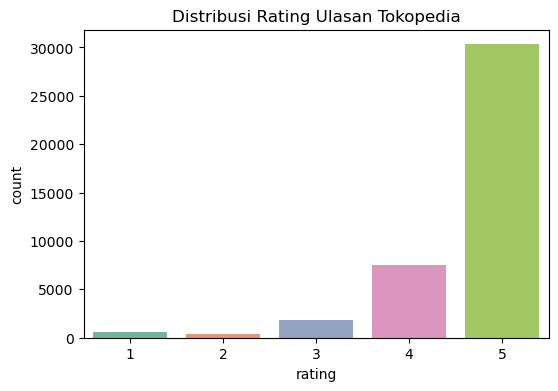

In [8]:
# 5. Distribusi rating
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=data, palette='Set2')
plt.title("Distribusi Rating Ulasan Tokopedia")
plt.show()


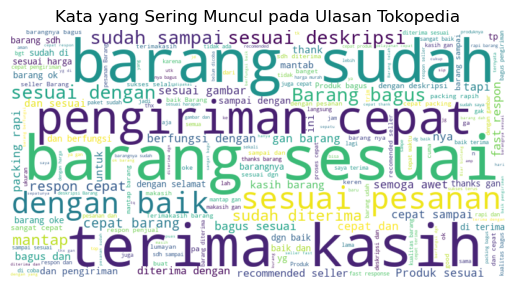

In [9]:
# WordCloud
wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data['text'].astype(str)))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Kata yang Sering Muncul pada Ulasan Tokopedia")
plt.show()

## Data Text Processing

In [10]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

In [11]:
# 1. Tokenisasi
data['tokens'] = data['text'].astype(str).apply(word_tokenize)
data[['text', 'tokens']].head(50)


,text,tokens
0,Barang sesuai pesanan dan cepat sampai,"[Barang, sesuai, pesanan, dan, cepat, sampai]"
1,Barang bagus harga murah,"[Barang, bagus, harga, murah]"
2,Paket rapi...mantap....cepat....sampe ke tujuan,"[Paket, rapi, ..., mantap, ...., cepat, ...., ..."
3,ya saya puas dgn barangnya,"[ya, saya, puas, dgn, barangnya]"
4,Responya luar biasa b mantap,"[Responya, luar, biasa, b, mantap]"
5,"seller top, pengiriman cepat barang oke","[seller, top, ,, pengiriman, cepat, barang, oke]"
6,pengiriman cepat seller top,"[pengiriman, cepat, seller, top]"
7,Produk sesuai dengan spec di web dan respon se...,"[Produk, sesuai, dengan, spec, di, web, dan, r..."
8,"Respon super cepat, pengiriman cepat, Barang b...","[Respon, super, cepat, ,, pengiriman, cepat, ,..."
9,"Barang mantap, pelayanan cepat","[Barang, mantap, ,, pelayanan, cepat]"


In [12]:
# 2. Lemmatization
data['tokens'] = data['text'].astype(str).apply(word_tokenize)
data[['text', 'tokens']].head(50)

,text,tokens
0,Barang sesuai pesanan dan cepat sampai,"[Barang, sesuai, pesanan, dan, cepat, sampai]"
1,Barang bagus harga murah,"[Barang, bagus, harga, murah]"
2,Paket rapi...mantap....cepat....sampe ke tujuan,"[Paket, rapi, ..., mantap, ...., cepat, ...., ..."
3,ya saya puas dgn barangnya,"[ya, saya, puas, dgn, barangnya]"
4,Responya luar biasa b mantap,"[Responya, luar, biasa, b, mantap]"
5,"seller top, pengiriman cepat barang oke","[seller, top, ,, pengiriman, cepat, barang, oke]"
6,pengiriman cepat seller top,"[pengiriman, cepat, seller, top]"
7,Produk sesuai dengan spec di web dan respon se...,"[Produk, sesuai, dengan, spec, di, web, dan, r..."
8,"Respon super cepat, pengiriman cepat, Barang b...","[Respon, super, cepat, ,, pengiriman, cepat, ,..."
9,"Barang mantap, pelayanan cepat","[Barang, mantap, ,, pelayanan, cepat]"


In [ ]:
# 3. Stemming
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_tokens(tokens):
    lemmas = [lemmatizer.lemmatize(t.lower()) for t in tokens]   # Lemmatization
    stems = [stemmer.stem(t) for t in lemmas]                    # Stemming
    return stems

data['processed_tokens'] = data['tokens'].apply(preprocess_tokens)
data[['text', 'processed_tokens']].head(50)

In [14]:
# 4. Stopword removal (Tanda baca, angka dan kata)
stop_words = set(stopwords.words('indonesian'))

def clean_text(text):
    text = text.lower()  # ubah ke huruf kecil
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    words = word_tokenize(text)  # tokenisasi
    words = [w for w in words if w not in stop_words]  # hapus stopword

    
    return ' '.join(words)


data['clean_text'] = data['text'].astype(str).apply(clean_text)
data[['text', 'clean_text']].head(50)


,text,clean_text
0,Barang sesuai pesanan dan cepat sampai,barang sesuai pesanan cepat
1,Barang bagus harga murah,barang bagus harga murah
2,Paket rapi...mantap....cepat....sampe ke tujuan,paket rapimantapcepatsampe tujuan
3,ya saya puas dgn barangnya,ya puas dgn barangnya
4,Responya luar biasa b mantap,responya b mantap
5,"seller top, pengiriman cepat barang oke",seller top pengiriman cepat barang oke
6,pengiriman cepat seller top,pengiriman cepat seller top
7,Produk sesuai dengan spec di web dan respon se...,produk sesuai spec web respon seller cepat tha...
8,"Respon super cepat, pengiriman cepat, Barang b...",respon super cepat pengiriman cepat barang bag...
9,"Barang mantap, pelayanan cepat",barang mantap pelayanan cepat


In [15]:
# 5. Text Normalisasi
normalisasi_kata = {
    "gk": "tidak", "ga": "tidak", "bgt": "banget", "sm": "sama", 
    "tdk": "tidak", "udh": "sudah", "tp": "tapi", "bgt": "banget", "dgn" : "dengan"
}

def normalisasi(text):
    tokens = text.split()
    tokens = [normalisasi_kata.get(word, word) for word in tokens]
    return ' '.join(tokens)

data['normalized_text'] = data['clean_text'].apply(normalisasi)
data[['text', 'normalized_text']].head(50)


,text,normalized_text
0,Barang sesuai pesanan dan cepat sampai,barang sesuai pesanan cepat
1,Barang bagus harga murah,barang bagus harga murah
2,Paket rapi...mantap....cepat....sampe ke tujuan,paket rapimantapcepatsampe tujuan
3,ya saya puas dgn barangnya,ya puas dengan barangnya
4,Responya luar biasa b mantap,responya b mantap
5,"seller top, pengiriman cepat barang oke",seller top pengiriman cepat barang oke
6,pengiriman cepat seller top,pengiriman cepat seller top
7,Produk sesuai dengan spec di web dan respon se...,produk sesuai spec web respon seller cepat tha...
8,"Respon super cepat, pengiriman cepat, Barang b...",respon super cepat pengiriman cepat barang bag...
9,"Barang mantap, pelayanan cepat",barang mantap pelayanan cepat


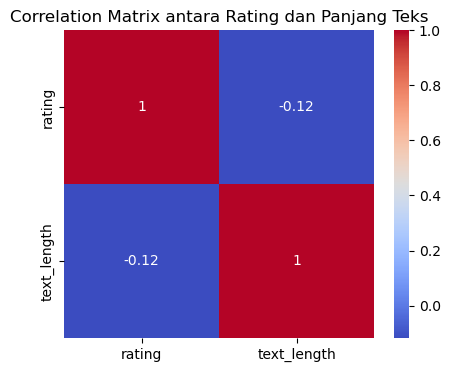

,rating,text_length
rating,1.000000,-0.117582
text_length,-0.117582,1.000000


In [16]:
#Correlation
data['text_length'] = data['normalized_text'].apply(lambda x: len(x.split()))

correlation_matrix = data[['rating', 'text_length']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix antara Rating dan Panjang Teks')
plt.show()

# Lihat hasil matriks
correlation_matrix

In [17]:
# 7. Labeling data
def label_sentimen(rating):
    if rating >= 4:
        return "positif"
    elif rating == 3:
        return "netral"
    else:
        return "negatif"

data['label'] = data['rating'].apply(label_sentimen)
data[['text', 'rating', 'label']].head(50)


,text,rating,label
0,Barang sesuai pesanan dan cepat sampai,5,positif
1,Barang bagus harga murah,5,positif
2,Paket rapi...mantap....cepat....sampe ke tujuan,5,positif
3,ya saya puas dgn barangnya,5,positif
4,Responya luar biasa b mantap,5,positif
5,"seller top, pengiriman cepat barang oke",5,positif
6,pengiriman cepat seller top,5,positif
7,Produk sesuai dengan spec di web dan respon se...,5,positif
8,"Respon super cepat, pengiriman cepat, Barang b...",5,positif
9,"Barang mantap, pelayanan cepat",5,positif


In [18]:
# 8. Text Vektorisasi TF-IDF
tfidf = TfidfVectorizer(
    max_features=1000,        # hanya ambil 1000 kata paling penting
    stop_words='english',     # hilangkan stopwords bahasa Inggris
    ngram_range=(1,2)         # ambil unigram dan bigram
)

tfidf_matrix = tfidf.fit_transform(data['normalized_text'])

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

tfidf_df.head(50)

,abis,ad,adem,admin,aga,agan,air,aja,akurat,alamat,...,yaa,yaaa,yah,yes,yg,yg berbicara,yg bicara,yg diharapkan,yg dikirim,yg dipesan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan
# Fitur dan label
X = data['clean_text']
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 32485
Jumlah data uji: 8122


## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih
Pada tahap ini dilakukan pemodelan menggunakan algoritma Logistic Regression untuk melakukan klasifikasi sentimen pada data review Tokopedia tahun 2019.
Model ini dipilih karena sederhana, efisien, dan sering digunakan dalam kasus klasifikasi teks seperti analisis sentimen.

Model Logistic Regression dipilih karena merupakan salah satu algoritma paling populer dan efektif untuk klasifikasi biner maupun multi-kelas, termasuk analisis sentimen teks (positif, negatif, netral).
Beberapa alasan pemilihannya:
1. Sederhana dan efisien untuk dataset teks dengan banyak fitur (hasil TF-IDF).
2. Cepat dilatih dan tidak memerlukan daya komputasi besar.
3. Dapat memberikan probabilitas prediksi, bukan hanya label.
4. Sering menjadi baseline model sebelum mencoba model yang lebih kompleks (seperti SVM atau BERT).

In [20]:
# Misal kolom teks = 'text', label = 'label'
X = data['text']  # data teks
y = data['label']  # target klasifikasi

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ubah teks menjadi vektor TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Buat model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)  # model sekarang dilatih dengan angka

# Prediksi
y_pred = model.predict(X_test_tfidf)

# Hitung akurasi
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model Logistic Regression:", round(acc*100, 2), "%")

Akurasi Model Logistic Regression: 93.91 %


## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

In [21]:
print("Kelas yang ada di y_pred:", np.unique(y_pred))
print("Kelas yang ada di y_test:", np.unique(y_test))


Kelas yang ada di y_pred: ['negatif' 'netral' 'positif']
Kelas yang ada di y_test: ['negatif' 'netral' 'positif']


In [22]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("=== Confusion Matrix ===")
print(cm)

=== Confusion Matrix ===
[[  48   11  116]
 [  12   14  327]
 [  15   14 7565]]


In [23]:
#2. Laporann Klasifikasi (Classification report)
cr = classification_report(y_test, y_pred)
print("\n=== Classification Report ===")
print(cr)


=== Classification Report ===
              precision    recall  f1-score   support

     negatif       0.64      0.27      0.38       175
      netral       0.36      0.04      0.07       353
     positif       0.94      1.00      0.97      7594

    accuracy                           0.94      8122
   macro avg       0.65      0.44      0.48      8122
weighted avg       0.91      0.94      0.92      8122



## Data Prediksi

In [24]:
# Contoh data baru yang ingin diprediksi
new_texts = [
    "barang jelek",
    "bagus banget sesuai banget",
    "mantap sihh inimah"
]
new_tfidf = vectorizer.transform(new_texts)
new_pred = model.predict(new_tfidf)

import pandas as pd

df_new_pred = pd.DataFrame({
    'Text': new_texts,
    'Predicted_Label': new_pred
})


print(df_new_pred)


                         Text Predicted_Label
0                barang jelek         negatif
1  bagus banget sesuai banget         positif
2          mantap sihh inimah         positif
